### Data Engineering in a nutshell
"As Data Engineers, we often need to bring data from different sources, clean it, and make it usable for analysis. Today, we'll see how to handle missing data and what happens next!"


<figure>
    <img src="https://bigblue.academy/uploads/images/blog/why-to-become-a-data-engineer/bigblue-(8).jpg" width="600" height="350">
    <figcaption>Source: bigblue.academy</figcaption>
</figure>

<figure>
    <img src="https://lh7-us.googleusercontent.com/6G1ttzO6gdIQOJaGA8qEd6LsC3v7h6hOpViATaU3ql8TbOo7oqFltxIwiYUrdGDuheodtCc2cN5NpEiLz_YqsOyOeQu98Q7aid3kpdRPKFGvV-OBrC9nSnAJPx-7f5GY91CvzDVcCd-9l_JfNIxsuEA" width="721" height="545">
    <figcaption>Source: ccslearningacademy.com</figcaption>
</figure>

<figure>
    <img src="https://opendatascience.com/wp-content/uploads/2022/01/DESkills-768x396-1.png" width="770" height="430">
    <figcaption>Source: opendatascience.com/</figcaption>
</figure>


### Investigate the data

In [45]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os

In [47]:
movie_df = pd.read_csv(r"C:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\SQL\MovieMasters\movie_master_clean.csv", delimiter=";")

In [48]:
movie_df.head()

,film_id,imdb_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,5708,tt0421082,Control,121.0,2007,/dr/,"8,00969","7,5",NaN,8159508,Sam Riley,Samantha Morton,Alexandra Maria Lara,Anton Corbijn,Matt Greenhalgh,Becker International
1,6535,tt0796368,Talk to Me,118.0,2007,/dr/,"7,960831","7,1",NaN,4778376,Don Cheadle,Chiwetel Ejiofor,Taraji P Henson,Kasi Lemmons,Michael Genet,The Mark Gordon Company
2,9503,tt0458455,Pope Joan,149.0,2009,/dr/,"7,289967","6,5",NaN,27412220,John Goodman,Johanna Wokalek,David Wenham,Sönke Wortmann,Heinrich Hadding,Constantin Film
3,9918,tt0385726,Glory Road,118.0,2006,/dr/,"5,244654","7,2",NaN,42647449,Josh Lucas,Derek Luke,Jon Voight,James Gartner,NaN,Walt Disney Pictures
4,10190,tt0787523,Towelhead,111.0,2008,/dr/,"3,376907","6,5",NaN,367638,Summer Bishil,Aaron Eckhart,Toni Collette,Alan Ball,Alan Ball,This Is That Productions


In [49]:
len(movie_df)

2330

In [50]:
nan_production_cost_rows = movie_df[movie_df['production_cost'].isna()]
nan_production_cost_rows.head(5)

,film_id,imdb_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,5708,tt0421082,Control,121.0,2007,/dr/,"8,00969","7,5",NaN,8159508,Sam Riley,Samantha Morton,Alexandra Maria Lara,Anton Corbijn,Matt Greenhalgh,Becker International
1,6535,tt0796368,Talk to Me,118.0,2007,/dr/,"7,960831","7,1",NaN,4778376,Don Cheadle,Chiwetel Ejiofor,Taraji P Henson,Kasi Lemmons,Michael Genet,The Mark Gordon Company
2,9503,tt0458455,Pope Joan,149.0,2009,/dr/,"7,289967","6,5",NaN,27412220,John Goodman,Johanna Wokalek,David Wenham,Sönke Wortmann,Heinrich Hadding,Constantin Film
3,9918,tt0385726,Glory Road,118.0,2006,/dr/,"5,244654","7,2",NaN,42647449,Josh Lucas,Derek Luke,Jon Voight,James Gartner,NaN,Walt Disney Pictures
4,10190,tt0787523,Towelhead,111.0,2008,/dr/,"3,376907","6,5",NaN,367638,Summer Bishil,Aaron Eckhart,Toni Collette,Alan Ball,Alan Ball,This Is That Productions


In [51]:
len(nan_production_cost_rows)

488

In [52]:
len(movie_df[~movie_df['production_cost'].isna()])

1842

In [53]:
nan_production_cost_rows = nan_production_cost_rows[['imdb_id', 'production_cost']]

In [54]:
nan_production_cost_rows.head()

,imdb_id,production_cost
0,tt0421082,NaN
1,tt0796368,NaN
2,tt0458455,NaN
3,tt0385726,NaN
4,tt0787523,NaN


### boxofficemojo scraping for missing data

In [57]:
url = "https://www.boxofficemojo.com/title/tt1707386/"
response = requests.get(url)

In [58]:
soup = BeautifulSoup(response.content, 'html.parser')

In [60]:
soup.prettify()

'<!DOCTYPE html>\n<html class="a-no-js" data-19ax5a9jf="dingo">\n <head>\n  <script>\n   var aPageStart = (new Date()).getTime();\n  </script>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   var ue_t0=ue_t0||+new Date();\n  </script>\n  <script type="text/javascript">\n   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\n\n    var ue_err_chan = \'jserr-rw\';\n(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b|

In [61]:
budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')

In [62]:
budget_section

<div class="a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile"><div class="a-section a-spacing-none"><span>Domestic Distributor</span><span>Universal Pictures<br/><a class="a-size-small a-link-normal" href="https://pro.imdb.com/company/co0005073/boxoffice/?ref_=mojo_tt_su&amp;rf=mojo_tt_su" rel="noopener" target="_blank">See full company information<svg class="mojo-new-window-svg" viewbox="0 0 32 32" xmlns="http://www.w3.org/2000/svg">
<path d="M24,15.57251l3,3V23.5A3.50424,3.50424,0,0,1,23.5,27H8.5A3.50424,3.50424,0,0,1,5,23.5V8.5A3.50424,3.50424,0,0,1,8.5,5h4.92755l3,3H8.5a.50641.50641,0,0,0-.5.5v15a.50641.50641,0,0,0,.5.5h15a.50641.50641,0,0,0,.5-.5ZM19.81952,8.56372,12.8844,17.75a.49989.49989,0,0,0,.04547.65479l.66534.66528a.49983.49983,0,0,0,.65479.04553l9.18628-6.93518,2.12579,2.12585a.5.5,0,0,0,.84741-.27526l1.48273-9.35108a.50006.50006,0,0,0-.57214-.57214L17.969,5.59058a.5.5,0,0,0-.27526.84741Z"></path>
</svg></a></span></div><div class="a-section a-spacing-n

In [103]:
budget = None

# Loop through the divs in the budget section to find the budget
for div in budget_section.find_all('div', class_='a-section a-spacing-none'):
    if 'Budget' in div.text:
        budget = div.find_all('span')[1].text.strip()  # Get the second span which contains the budget value
        break

# Print the extracted budget
print(budget)

$61,000,000


In [64]:
def fetch_budget(imdb_id: str) -> str:
    """Getting the "Budget" from Box Office Mojo website by imdb_id.

    :param imdb_id: The ID for the movie (example "tt0424880").
    :return:        A string representation of the budget (example: "$61,000,000").
    """
    url = f"https://www.boxofficemojo.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')

    if budget_section:
        for div in budget_section.find_all('div', class_='a-section a-spacing-none'):
            if 'Budget' in div.text:
                budget = div.find_all('span')[1].text.strip()  # Get the second span which contains the budget value
                return budget
    return None

### Loop through all the missing IDs

In [65]:
for index, row in nan_production_cost_rows.iterrows():
    imdb_id = row['imdb_id']
    budget = fetch_budget(imdb_id)

    if budget:
        # Clean the budget string (e.g., "$61,000,000" -> 61000000)
        try:
            cleaned_budget = int(budget.replace("$", "").replace(",", ""))
            # Update the production_cost column in the original DataFrame
            nan_production_cost_rows.at[index, 'production_cost'] = cleaned_budget
            print(f"Updated {imdb_id} with budget: {cleaned_budget}")
        except (AttributeError, ValueError):
            print(f"Failed to clean budget for {imdb_id}: {budget}")
    else:
        print(f"No budget found for {imdb_id}")

No budget found for tt0421082
No budget found for tt0796368
No budget found for tt0458455
No budget found for tt0385726
No budget found for tt0787523
No budget found for tt0445990
No budget found for tt0796302
No budget found for tt1037218
No budget found for tt0888693
No budget found for tt0847897
No budget found for tt0822849
No budget found for tt0948535
No budget found for tt0810951
No budget found for tt1183923
No budget found for tt1054580
No budget found for tt1422020
Updated tt1405500 with budget: 21000000
No budget found for tt1322264
No budget found for tt1366409
No budget found for tt0829098
No budget found for tt1312254
No budget found for tt1530975
No budget found for tt1533013
No budget found for tt1450328
No budget found for tt1683526
No budget found for tt1802197
No budget found for tt0455323
No budget found for tt1870529
No budget found for tt1720182
No budget found for tt1827578
No budget found for tt1907731
No budget found for tt1781840
No budget found for tt0975645


In [ ]:
for index, row in nan_production_cost_rows.iterrows():
    imdb_id = row['imdb_id']
    budget = fetch_budget(imdb_id)

    if budget:
        # Clean the budget string (e.g., "$61,000,000" -> 61000000)
        try:
            cleaned_budget = int(budget.replace("$", "").replace(",", ""))
            # Update the production_cost column in the original DataFrame
            nan_production_cost_rows.at[index, 'production_cost'] = cleaned_budget
            print(f"Updated {imdb_id} with budget: {cleaned_budget}")
        except (AttributeError, ValueError):
            print(f"Failed to clean budget for {imdb_id}: {budget}")
    else:
        print(f"No budget found for {imdb_id}")

No budget found for tt0421082
No budget found for tt0796368
No budget found for tt0458455
No budget found for tt0385726
No budget found for tt0787523
No budget found for tt0445990
No budget found for tt0796302
No budget found for tt1037218
No budget found for tt0888693
No budget found for tt0847897
No budget found for tt0822849
No budget found for tt0948535
No budget found for tt0810951
No budget found for tt1183923
No budget found for tt1054580
No budget found for tt1422020
Updated tt1405500 with budget: 21000000
No budget found for tt1322264
No budget found for tt1366409
No budget found for tt0829098
No budget found for tt1312254
No budget found for tt1530975
No budget found for tt1533013
No budget found for tt1450328
No budget found for tt1683526
No budget found for tt1802197
No budget found for tt0455323
No budget found for tt1870529
No budget found for tt1720182
No budget found for tt1827578
No budget found for tt1907731
No budget found for tt1781840
No budget found for tt0975645


In [66]:
nan_production_cost_rows.head()

,imdb_id,production_cost
0,tt0421082,NaN
1,tt0796368,NaN
2,tt0458455,NaN
3,tt0385726,NaN
4,tt0787523,NaN


In [104]:
movie_df.query("imdb_id == 'tt0486655'")

,imdb_id,film_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
86,tt0486655,2270,Stardust,127.0,2007,/ad//fm//fn//ro/,"14,784525",NaN,70000000.0,135560026,Claire Danes,Charlie Cox,Michelle Pfeiffer,Matthew Vaughn,Matthew Vaughn,Paramount Pictures


In [68]:
movie_df.set_index('imdb_id', inplace=True)
nan_production_cost_rows.set_index('imdb_id', inplace=True)

# Update movie_df
movie_df.update(nan_production_cost_rows)
movie_df.reset_index(inplace=True)

In [69]:
movie_df.query("imdb_id == 'tt0486655'")

,imdb_id,film_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
86,tt0486655,2270,Stardust,127.0,2007,/ad//fm//fn//ro/,"14,784525","7,2",70000000.0,135560026,Claire Danes,Charlie Cox,Michelle Pfeiffer,Matthew Vaughn,Matthew Vaughn,Paramount Pictures


In [83]:
len(movie_df[movie_df['production_cost'].isna()])

475

In [84]:
#movie_df['average_rating'] = pd.to_numeric(movie_df['average_rating'], errors='coerce')
movie_df_filtered = movie_df[movie_df['average_rating'] > 7]

In [91]:
movie_df["average_rating"].unique()

array([nan,  7.,  6.,  5.,  8.,  0.,  4.,  2.])

In [92]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_id             2330 non-null   object 
 1   film_id             2330 non-null   int64  
 2   title               2330 non-null   object 
 3   duration_minutes    2328 non-null   float64
 4   year_released       2330 non-null   int64  
 5   genres              2330 non-null   object 
 6   popularity          2330 non-null   object 
 7   average_rating      268 non-null    float64
 8   production_cost     1855 non-null   float64
 9   box_office_revenue  2330 non-null   int64  
 10  actor1              2328 non-null   object 
 11  actor2              2322 non-null   object 
 12  actor3              2321 non-null   object 
 13  director            2328 non-null   object 
 14  writer              2205 non-null   object 
 15  production_company  2247 non-null   object 
dtypes: flo

In [93]:
# movie_df["average_rating"] = movie_df["average_rating"].str.replace(',', '.').astype(float)

movie_df.head()

,imdb_id,film_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,tt0421082,5708,Control,121.0,2007,/dr/,"8,00969",NaN,NaN,8159508,Sam Riley,Samantha Morton,Alexandra Maria Lara,Anton Corbijn,Matt Greenhalgh,Becker International
1,tt0796368,6535,Talk to Me,118.0,2007,/dr/,"7,960831",NaN,NaN,4778376,Don Cheadle,Chiwetel Ejiofor,Taraji P Henson,Kasi Lemmons,Michael Genet,The Mark Gordon Company
2,tt0458455,9503,Pope Joan,149.0,2009,/dr/,"7,289967",NaN,NaN,27412220,John Goodman,Johanna Wokalek,David Wenham,Sönke Wortmann,Heinrich Hadding,Constantin Film
3,tt0385726,9918,Glory Road,118.0,2006,/dr/,"5,244654",NaN,NaN,42647449,Josh Lucas,Derek Luke,Jon Voight,James Gartner,NaN,Walt Disney Pictures
4,tt0787523,10190,Towelhead,111.0,2008,/dr/,"3,376907",NaN,NaN,367638,Summer Bishil,Aaron Eckhart,Toni Collette,Alan Ball,Alan Ball,This Is That Productions


In [94]:
movie_df["average_rating"].dtype


dtype('float64')

In [98]:
movie_df_filtered = movie_df[movie_df['average_rating'] >= 7]

In [99]:
movie_df_filtered["average_rating"].unique()

array([7., 8.])

In [100]:
movie_df_filtered = movie_df_filtered[["imdb_id", "production_cost"]]
movie_df_filtered.head()

,imdb_id,production_cost
16,tt1405500,21000000.0
91,tt0424880,NaN
173,tt1226774,NaN
197,tt1229822,NaN
211,tt1179947,NaN


In [101]:
print(movie_df.dtypes)


imdb_id                object
film_id                 int64
title                  object
duration_minutes      float64
year_released           int64
genres                 object
popularity             object
average_rating        float64
production_cost       float64
box_office_revenue      int64
actor1                 object
actor2                 object
actor3                 object
director               object
writer                 object
production_company     object
dtype: object


In [102]:
movie_df.to_csv("movie_masters_updated.csv", index=False)
movie_df_filtered.to_csv("movie_masters_updated_filtered.csv", index=False)

# movie_df.to_csv(r"c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\WEB_scrip\data_web_scraping\movie_masters_updated.csv", index=False)
# movie_df_filtered.to_csv(r"c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\WEB_scrip\data_web_scraping\movie_masters_updated_filtered.csv", index=False)


### Bonus: How this works in the real life
In production you likely wouldn't run just notebooks as a Data Engineer. Often you work in a python package, and when a task like this comes, you'll expand this package with this functionality.

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests


def fetch_budget(imdb_id: str) -> int:
    """Fetch the 'Budget' from Box Office Mojo using imdb_id.

    :param imdb_id: The ID of the movie (e.g., "tt0424880").
    :return:        Budget as an integer (e.g., 61000000), or None if not found.
    """
    url = f"https://www.boxofficemojo.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')

    if budget_section:
        for div in budget_section.find_all('div', class_='a-section a-spacing-none'):
            if 'Budget' in div.text:
                try:
                    budget = div.find_all('span')[1].text.strip()
                    return int(budget.replace("$", "").replace(",", ""))
                except (AttributeError, ValueError):
                    return None
    return None


def update_missing_production_cost(movie_df: pd.DataFrame) -> None:
    """Find missing production_cost values, scrape budget, and update the DataFrame in place.

    :param movie_df: The DataFrame containing movie data.
    """
    missing_budget_rows = movie_df['production_cost'].isna()

    for index in movie_df[missing_budget_rows].index:
        imdb_id = movie_df.at[index, 'imdb_id']
        budget = fetch_budget(imdb_id)

        if budget:
            movie_df.at[index, 'production_cost'] = budget
            print(f"Updated {imdb_id} with budget: {budget}")
        else:
            print(f"No budget found for {imdb_id}")


def process_movie_data(file_path: str) -> None:
    """Reads, processes, updates, and saves the movie dataset.

    :param file_path: Path to the input CSV file.
    """
    movie_df = pd.read_csv(file_path, delimiter=";")

    # Update missing production costs directly in movie_df
    update_missing_production_cost(movie_df)

    # Convert ratings to float
    movie_df["average_rating"] = movie_df["average_rating"].str.replace(',', '.').astype(float)

    # Filter movies with a rating of 7 or higher
    movie_df_filtered = movie_df[movie_df['average_rating'] >= 7][["imdb_id", "production_cost"]]

    # Save updated files
    movie_df.to_csv("movies_updated.csv", index=False)
    movie_df_filtered.to_csv("movies_updated_filtered.csv", index=False)
    print("Files saved successfully.")


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests


def fetch_budget(imdb_id: str) -> int:
    """Fetch the 'Budget' from Box Office Mojo using imdb_id.

    :param imdb_id: The ID of the movie (e.g., "tt0424880").
    :return:        Budget as an integer (e.g., 61000000), or None if not found.
    """
    url = f"https://www.boxofficemojo.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')

    if budget_section:
        for div in budget_section.find_all('div', class_='a-section a-spacing-none'):
            if 'Budget' in div.text:
                try:
                    budget = div.find_all('span')[1].text.strip()
                    return int(budget.replace("$", "").replace(",", ""))
                except (AttributeError, ValueError):
                    return None
    return None


def update_missing_production_cost(movie_df: pd.DataFrame) -> None:
    """Find missing production_cost values, scrape budget, and update the DataFrame in place.

    :param movie_df: The DataFrame containing movie data.
    """
    missing_budget_rows = movie_df['production_cost'].isna()

    for index in movie_df[missing_budget_rows].index:
        imdb_id = movie_df.at[index, 'imdb_id']
        budget = fetch_budget(imdb_id)

        if budget:
            movie_df.at[index, 'production_cost'] = budget
            print(f"Updated {imdb_id} with budget: {budget}")
        else:
            print(f"No budget found for {imdb_id}")


def process_movie_data(file_path: str) -> None:
    """Reads, processes, updates, and saves the movie dataset.

    :param file_path: Path to the input CSV file.
    """
    movie_df = pd.read_csv(file_path, delimiter=";")

    # Update missing production costs directly in movie_df
    update_missing_production_cost(movie_df)

    # Convert ratings to float
    movie_df["average_rating"] = movie_df["average_rating"].str.replace(',', '.').astype(float)

    # Filter movies with a rating of 7 or higher
    movie_df_filtered = movie_df[movie_df['average_rating'] >= 7][["imdb_id", "production_cost"]]

    # Save updated files
    movie_df.to_csv("movies_updated.csv", index=False)
    movie_df_filtered.to_csv("movies_updated_filtered.csv", index=False)
    print("Files saved successfully.")


In [ ]:
# Other parts of the pipeline
# .
# .
# .
# .

process_movie_data("/content/movies_cleaned.csv")

# .
# .
# .
# .

### Bonus: Data Quality with Great Expectations

**Why it's important** ("Garbage In, Garbage Out"):<br>
AI models learn from data. The quality of data determine how efffectively they can learn.

**Why Data Quality Issues Occur?**<br>
Data is often collected for operational purposes rather than being explicitly designed for analytics, machine learning, or AI. Without clear ownership, no one is accountable for maintaining its accuracy and reliability.

Many organisations struggle with data visibility, teams don't always know what data exists, where it's stored, or how it's being used. This lack of awareness leads to inconsistent or redundant data usage.


In [ ]:
!pip install great_expectations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled 

In [105]:
from great_expectations.core.batch import Batch
from great_expectations.validator.validator import Validator
from great_expectations.execution_engine.pandas_execution_engine import PandasExecutionEngine
from great_expectations import get_context

metric column.standard_deviation.aggregate_fn is being registered with different metric_provider; overwriting metric_provider


In [106]:
# 1. Create a context:
context = get_context()

# 2. Create a Spark Execution Engine
execution_engine = PandasExecutionEngine()

# 3. Create a Batch from the DataFrame
batch = Batch(data=movie_df)

# 4. Create a Validator with the batch and execution engine
validator = Validator(execution_engine=execution_engine, batches=[batch])

# 5. Add expectations
validator.expect_column_values_to_not_be_null(
    column="imdb_id",
)

validator.expect_column_values_to_not_be_null(
    column="production_cost",
)

validator.expect_column_values_to_be_between(
    column="average_rating",
    min_value=0,
    max_value=10
)

# 6. Run validation and get results
results = validator.validate()

# 7. Process results
if results["success"]:
    print("All validations passed!")
else:
    print("Some validations failed.")
    for result in results["results"]:
        print(f"Expectation: {result['expectation_config']['type']}")
        print(f"Success: {result['success']}")
        if not result["success"]:
            print(f"Details: {result['result']}")


c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be persisted. Please add the configuration to your Checkpoint config or checkpoint_run() method instead.
  warnings.warn(
Calculating Metrics: 100%|██████████| 6/6 [00:00<00:00, 271.14it/s]
c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be persisted. Please add the configuration to your Checkpoint config or checkpoint_run() method instead.
  warnings.warn(
Calculating Metrics: 100%|██████████| 6/6 [00:00<00:00, 334.54it/s] 
c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be p

Some validations failed.
Expectation: expect_column_values_to_not_be_null
Success: True
Expectation: expect_column_values_to_not_be_null
Success: False
Details: {'element_count': 2330, 'unexpected_count': 475, 'unexpected_percent': 20.386266094420602, 'partial_unexpected_list': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}
Expectation: expect_column_values_to_be_between
Success: True


In [107]:
validation_results = results["results"]

results_data = [
    {
        "Expectation": res["expectation_config"]["type"],
        "Column": res["expectation_config"]["kwargs"].get("column"),
        "Success": res["success"],
        "Count": res["result"].get("element_count", "N/A"),
        "Failed Records Count": res["result"].get("unexpected_count", "N/A"),
        "Failed Records %": res["result"].get("unexpected_percent", "N/A"),
    }
    for res in validation_results
]

validation_results_df = pd.DataFrame(results_data)

validation_results_df

,Expectation,Column,Success,Count,Failed Records Count,Failed Records %
0,expect_column_values_to_not_be_null,imdb_id,True,2330,0,0.000000
1,expect_column_values_to_not_be_null,production_cost,False,2330,475,20.386266
2,expect_column_values_to_be_between,average_rating,True,2330,0,0.000000


# Data Preparation - Creating the X and Y datasets

In [488]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [489]:
df_x = df2[['production_cost', 'box_office_revenue', 'average_rating']]
df_y = df2['average_rating']
df_z = df2['year_released']

x = np.array(df_x)
y = np.array(df_y)
z = np.array(df_z)


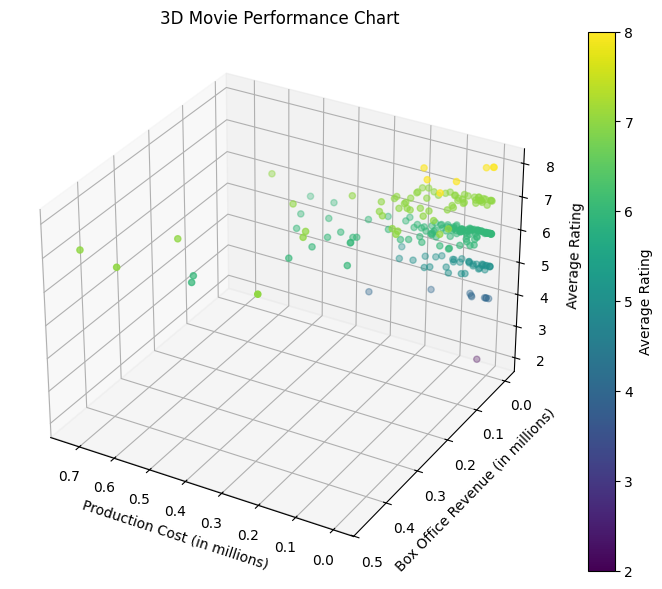

In [495]:
# Skálázd a 'Production Cost' és 'Box Office Revenue' értékeket külön-külön 0 és 1 közé
scaler_cost = MinMaxScaler()  # Production Cost skálázása
scaler_revenue = MinMaxScaler()  # Box Office Revenue skálázása

x[:, 0] = scaler_cost.fit_transform(x[:, 0].reshape(-1, 1)).flatten()  # Production Cost
x[:, 1] = scaler_revenue.fit_transform(x[:, 1].reshape(-1, 1)).flatten()  # Box Office Revenue


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot, ahol a szín az 'average_rating' szerint változik
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=x[:, 2], cmap='viridis', marker='o')

# Tengelyek címkézése
ax.set_xlabel('Production Cost (in millions)')
ax.set_ylabel('Box Office Revenue (in millions)')
ax.set_zlabel('Average Rating')

# Színbar menü hozzáadása
cbar = plt.colorbar(scatter)
cbar.set_label('Average Rating')

# Tengelyek megfordítása
ax.set_xlim(ax.get_xlim()[::-1])  # X tengely megfordítása
ax.set_ylim(ax.get_ylim()[::-1])  # Y tengely megfordítása
#ax.set_zlim(ax.get_zlim()[::-1])  # Z tengely megfordítása

# Cím beállítása
plt.title("3D Movie Performance Chart")
plt.show()


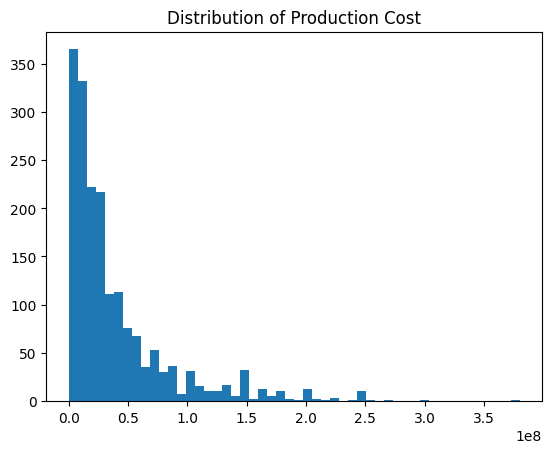

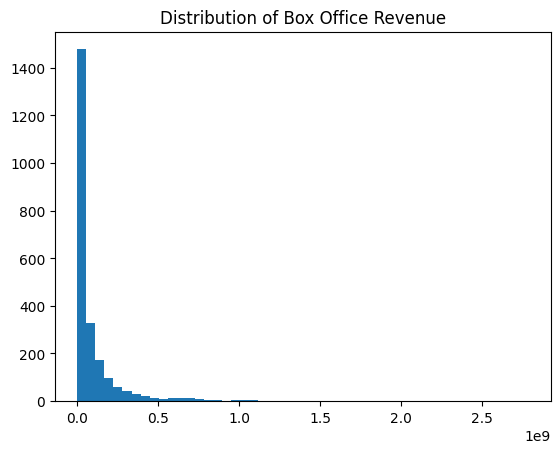

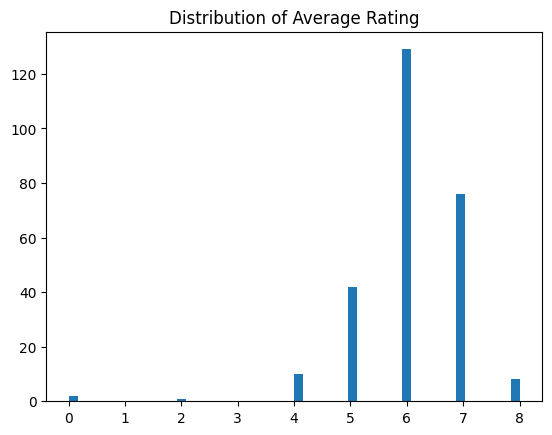

In [493]:

# Histogramok az egyes változókról
plt.hist(df_x['production_cost'], bins=50)
plt.title('Distribution of Production Cost')
plt.show()

plt.hist(df_x['box_office_revenue'], bins=50)
plt.title('Distribution of Box Office Revenue')
plt.show()

plt.hist(df_x['average_rating'], bins=50)
plt.title('Distribution of Average Rating')
plt.show()
